Importing The Libraries:

In [ ]:
# To hide errors 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('/content/gold_price_data.csv')

In [ ]:
# Creating a copy for further use
df = data.copy()

In [ ]:
# print first 5 rows in the dataframe
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# Number of rows and columns
data.shape

(2290, 6)

In [ ]:
# getting some basic informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values in Gold Data 
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# checking the duplicate values in Gold Data
data.duplicated().sum()

0

In [ ]:
# getting the statistical measures of the Gold data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1. Positive Correlation -> Rising values in one variable align with increasing values in another
2. Negative Correlation -> Rising values in one variable align with decreasing values in another

In [ ]:
data = data.drop(['Date'], axis = 1)
correlation = data.corr()

<Axes: >

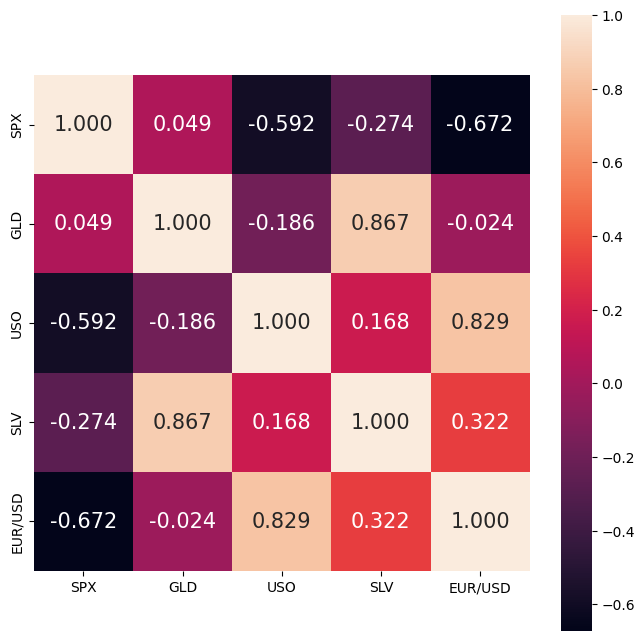

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.3f', annot = True, annot_kws = {'size': 15})

In [ ]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

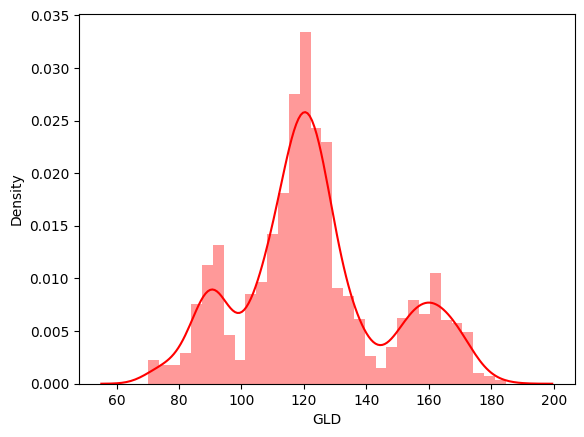

In [ ]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'], color = 'red')

Splitting the Features and Target

In [ ]:
# df is copy of data that we have created
A = df.drop(['Date', 'GLD'], axis=1)
B = df['GLD']

In [ ]:
print(A)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(B)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into train and test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.2, random_state=42)

**Model Training**

In [ ]:
regressor = RandomForestRegressor(n_estimators=500)

In [ ]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500)

In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[122.4959996  130.47674297 127.52129971  96.67143743 118.89512058
 114.44719925 124.81442127 117.78141938 108.03496114  98.30521946
  95.48125951 167.69109846 149.23186081 116.07438051 170.84390163
  84.84397985 123.22585888 109.38111717 113.29710064 131.59382313
 124.31087887 113.67454071 115.8068806  108.7604398  108.59408113
 125.83813914 119.14115963 112.30171928 113.46120134 125.72689887
 146.13804135  89.4943399  167.73167982 113.70185915 108.47190105
 120.1906811  141.89915863 161.22658153 174.1969581  153.19270141
 119.37984121 113.40382054 121.3759194  113.64481919 122.05039535
 108.03390075  88.67035887 114.44573923 129.76304257 117.94772102
 103.53820049 129.76426255 107.22549832 160.62612377 131.68708037
 118.03107975 147.01106009 134.70264208  95.51242106 124.57752143
 114.93331869  86.23106078 104.28835901 113.89948077  84.1770193
 122.29450017 116.56067899 113.56004198 165.1493828   92.41222029
  80.21614093 160.9855406  158.65296239 106.94846014 148.26640126
 109.572817

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score * 100)

R squared error :  98.95637839260137


Compare the Actual Values and Predicted Values in a Plot

In [ ]:
Y_test = list(Y_test)

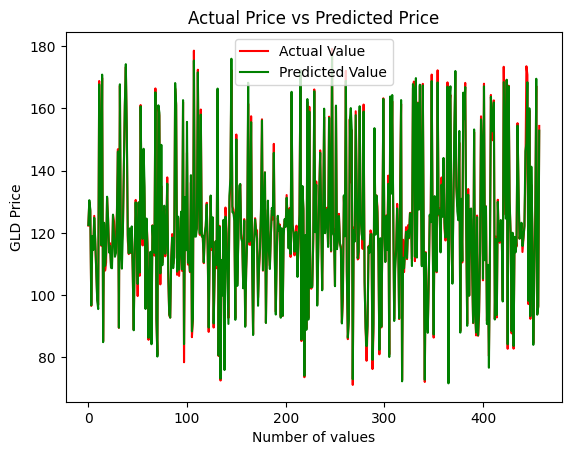

In [ ]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()